# Mod1/L3 The Gamma Distribution

## Definition
A continuous random variable X follows a Gamma distribution with parameters α (shape) and β (rate) if it has the probability density function:

$$ f(x; \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x} $$

where:
- $x > 0$
- $\alpha > 0$ (shape parameter)
- $\beta > 0$ (rate parameter)
- $\Gamma(\alpha)$ is the gamma function

## Important Properties
- Mean: $E[X] = \frac{\alpha}{\beta}$
- Variance: $Var(X) = \frac{\alpha}{\beta^2}$
- Skewness: $\frac{2}{\sqrt{\alpha}}$

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(density)` instead."


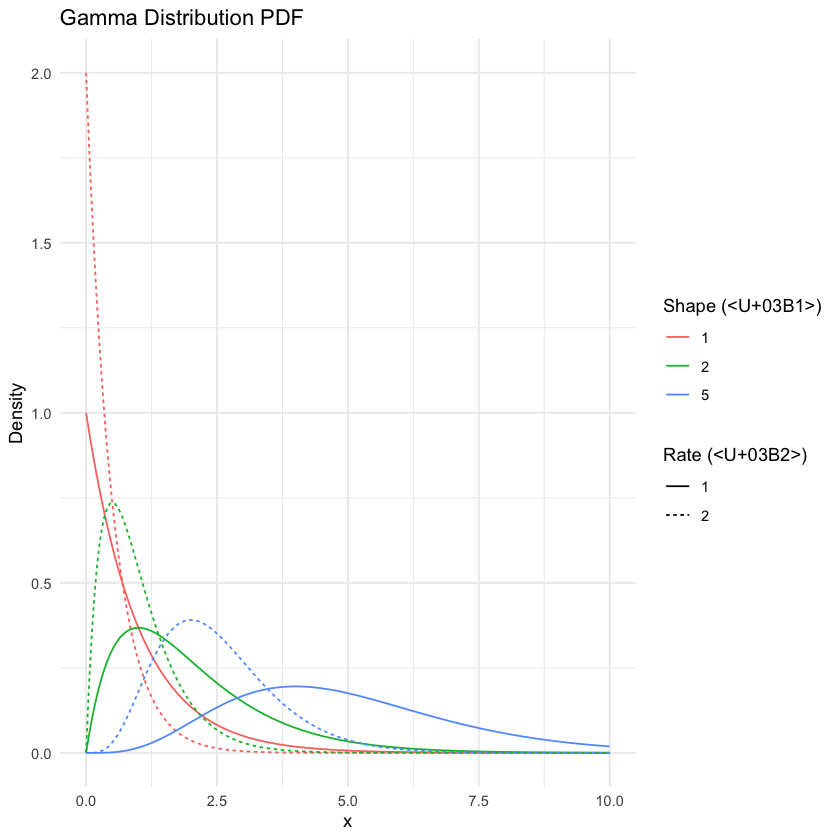

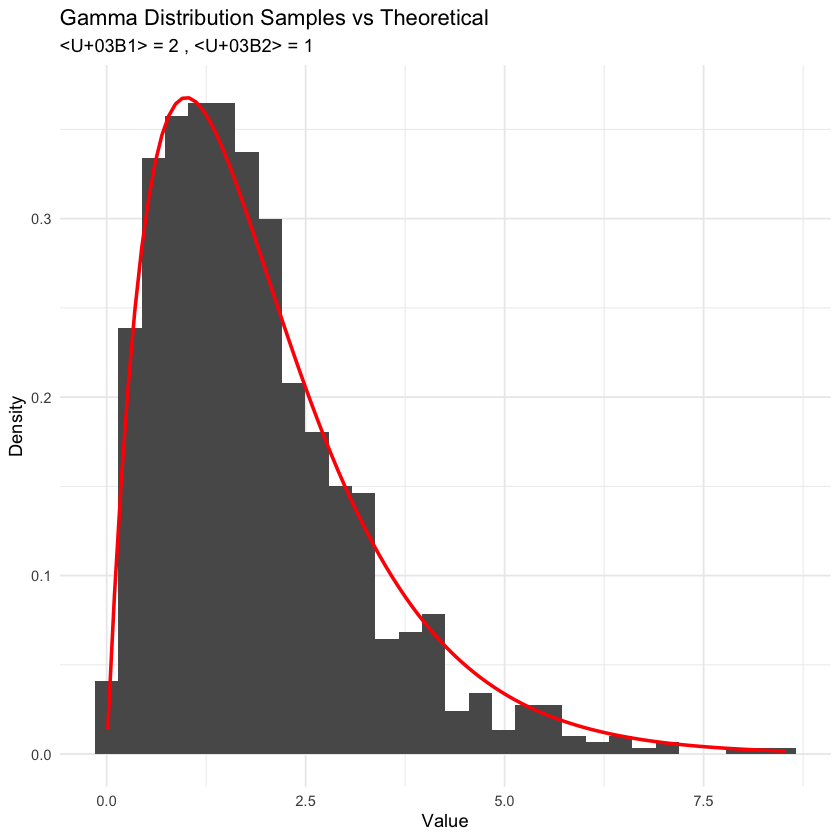

In [1]:
# Visualize Gamma Distribution with different parameters
library(ggplot2)

# Create plotting function
plot_gamma <- function(alpha_values, beta_values) {
    x <- seq(0, 10, length.out = 200)
    df <- expand.grid(x = x, 
                     alpha = alpha_values, 
                     beta = beta_values)
    
    df$density <- dgamma(df$x, shape = df$alpha, rate = df$beta)
    
    ggplot(df, aes(x = x, y = density, color = factor(alpha), 
                   linetype = factor(beta))) +
        geom_line() +
        labs(title = "Gamma Distribution PDF",
             x = "x", 
             y = "Density",
             color = "Shape (α)",
             linetype = "Rate (β)") +
        theme_minimal()
}

# Example plots
alpha_values <- c(1, 2, 5)
beta_values <- c(1, 2)

plot_gamma(alpha_values, beta_values)

# Generate random samples
set.seed(123)
n <- 1000
alpha <- 2
beta <- 1
samples <- rgamma(n, shape = alpha, rate = beta)

# Plot histogram of samples with theoretical density
ggplot() +
    geom_histogram(aes(x = samples, y = ..density..), bins = 30) +
    stat_function(fun = dgamma, args = list(shape = alpha, rate = beta), 
                 color = "red", size = 1) +
    labs(title = "Gamma Distribution Samples vs Theoretical",
         subtitle = paste("α =", alpha, ", β =", beta),
         x = "Value",
         y = "Density") +
    theme_minimal()

# The Gamma Distribution: A (more) Comprehensive Guide

## Definition and Parameters
The Gamma distribution has PDF:
$$ f(x; \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x} $$

where:
- $x > 0$
- $\alpha > 0$ (shape parameter)
- $\beta > 0$ (rate/inverse scale parameter)
- both parameters must be positive
- $\Gamma(\alpha)$ is the gamma function

## The Gamma Function
$\Gamma(\alpha) = \int_0^\infty x^{\alpha-1}e^{-x}dx$

Key properties:
1. $\Gamma(1) = 1$
2. For $\alpha > 1$: $\Gamma(\alpha) = (\alpha-1)\Gamma(\alpha-1)$
3. For positive integer n: $\Gamma(n) = (n-1)!$

## Shape Characteristics
- $\alpha > 1$: PDF starts at 0, rises to peak, then decays
- $\alpha = 1$: Exponential decay (special case)
- $0 < \alpha < 1$: Asymptotic at y-axis

## Chi-Square Distribution
Special case of Gamma where:
- $\alpha = n/2$
- $\beta = 1/2$
- n = degrees of freedom

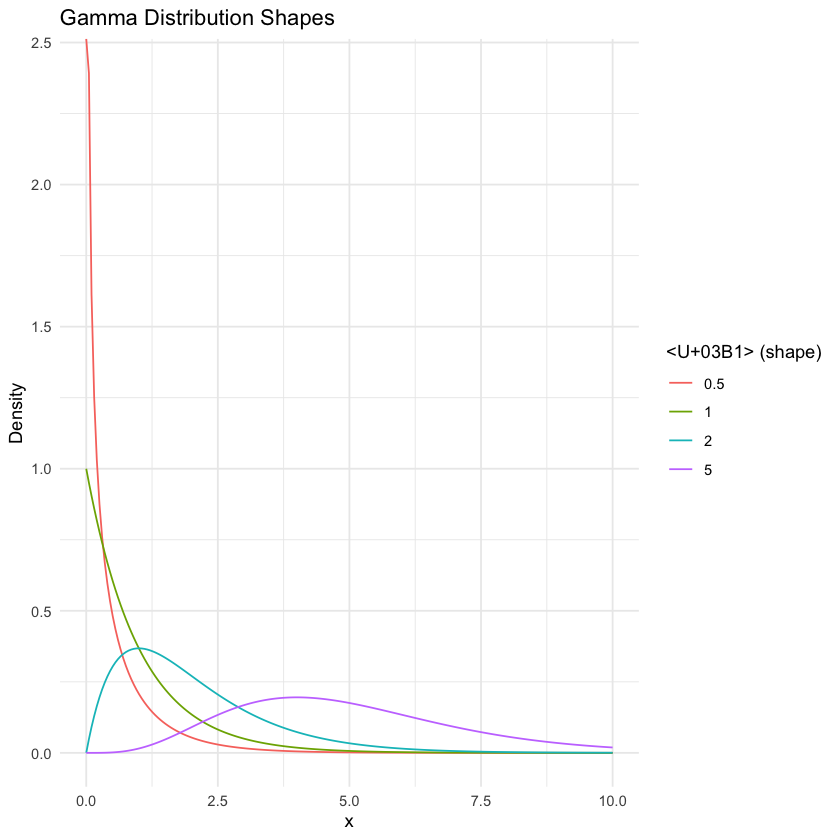

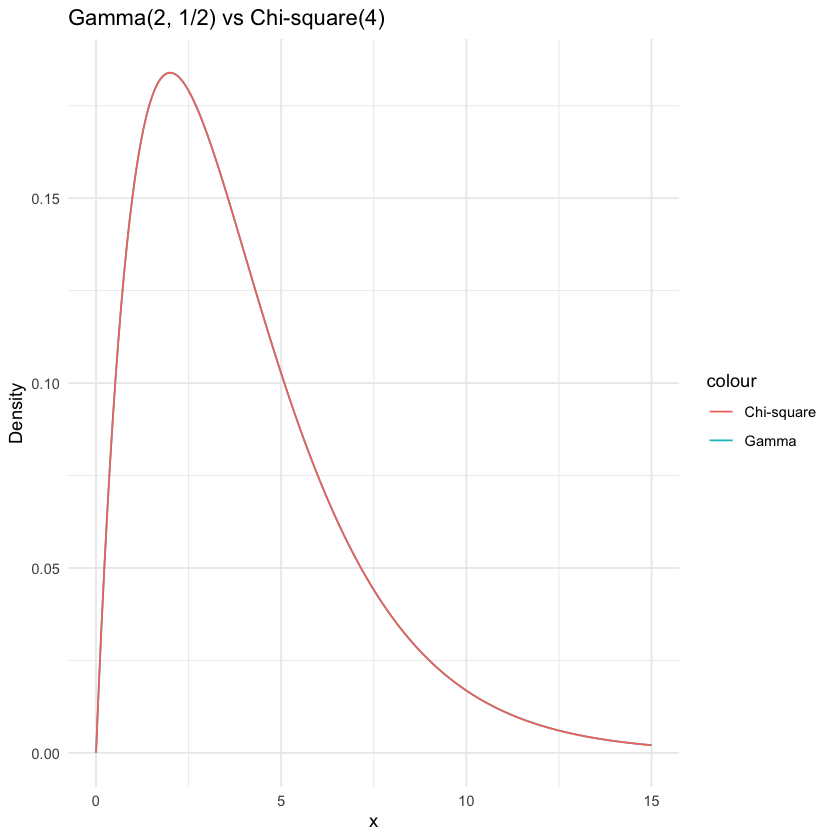

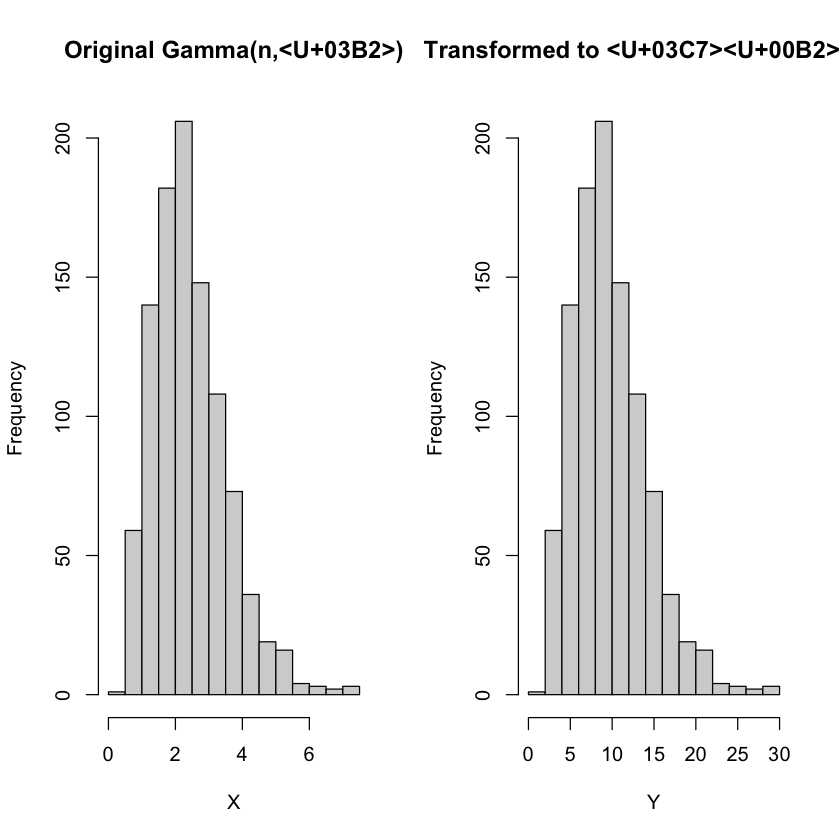

In [3]:
# Visualization of Gamma distributions
library(ggplot2)
# library(gridExtra)

# Function to plot Gamma PDFs
plot_gamma_shapes <- function() {
    x <- seq(0, 10, length.out = 200)
    alphas <- c(0.5, 1, 2, 5)
    beta <- 1
    
    df <- expand.grid(x = x, alpha = alphas)
    df$density <- dgamma(df$x, shape = df$alpha, rate = beta)
    
    ggplot(df, aes(x = x, y = density, color = factor(alpha))) +
        geom_line() +
        labs(title = "Gamma Distribution Shapes",
             x = "x", y = "Density",
             color = "α (shape)") +
        theme_minimal()
}

# Function to compare Gamma and Chi-square
plot_gamma_chisq <- function(n = 4) {
    x <- seq(0, 15, length.out = 200)
    
    # Gamma(n/2, 1/2) is equivalent to Chi-square(n)
    df <- data.frame(
        x = x,
        gamma = dgamma(x, shape = n/2, rate = 1/2),
        chisq = dchisq(x, df = n)
    )
    
    ggplot(df) +
        geom_line(aes(x = x, y = gamma, color = "Gamma")) +
        geom_line(aes(x = x, y = chisq, color = "Chi-square")) +
        labs(title = paste("Gamma(", n/2, ", 1/2) vs Chi-square(", n, ")", sep=""),
             x = "x", y = "Density") +
        theme_minimal()
}

# Display plots
p1 <- plot_gamma_shapes()
p2 <- plot_gamma_chisq()
# grid.arrange(p1, p2, ncol = 2)
p1
p2

# Example transformation
set.seed(123)
n <- 5
beta <- 2
X <- rgamma(1000, shape = n, rate = beta)
Y <- 2 * beta * X  # Transform to chi-square(2n)

# Compare histograms
par(mfrow = c(1,2))
hist(X, main = "Original Gamma(n,β)")
hist(Y, main = "Transformed to χ²(2n)")

## Another attempt

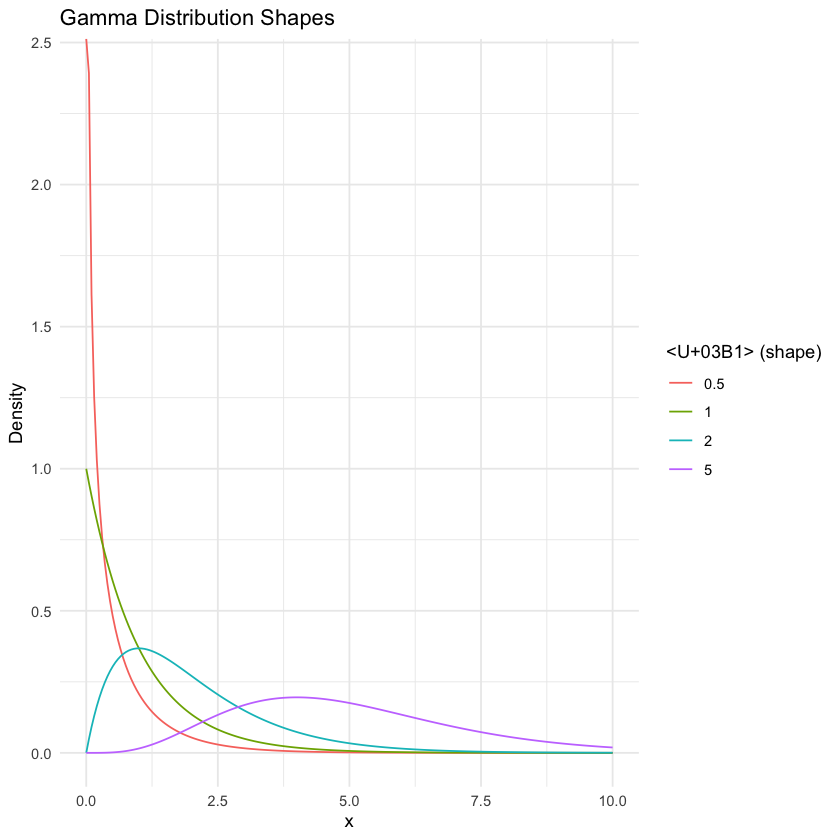

In [4]:
library(ggplot2)

# Compare Gamma shapes
x <- seq(0, 10, length.out = 200)
alphas <- c(0.5, 1, 2, 5)
beta <- 1

df <- expand.grid(x = x, alpha = alphas)
df$density <- dgamma(df$x, shape = df$alpha, rate = beta)

ggplot(df, aes(x = x, y = density, color = factor(alpha))) +
    geom_line() +
    labs(title = "Gamma Distribution Shapes",
         x = "x", y = "Density",
         color = "α (shape)") +
    theme_minimal()

# Gamma Distribution and Chi-Square Relationship

## Key Points

### 1. Gamma Distribution Basics
- **PDF**: 
  $$ f(x; \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x} $$
- **Parameters**: 
  - $\alpha$ (shape)
  - $\beta$ (rate/inverse scale)
- Both parameters must be positive

### 2. PDF Shape Properties
- $\alpha > 1$: Starts at 0, rises to peak, then decays
- $\alpha = 1$: Exponential decay (special case)
- $\alpha < 1$: Asymptotic at y-axis

### 3. Gamma Function Properties
- $\Gamma(1) = 1$
- For $\alpha > 1$: 
  $$ \Gamma(\alpha) = (\alpha-1)\Gamma(\alpha-1) $$
- For positive integer $n$: 
  $$ \Gamma(n) = (n-1)! $$

### 4. Transformation Property
- If $X \sim \text{Gamma}(\alpha, \beta)$ and $Y = cX$ ($c > 0$)
- Then $Y \sim \text{Gamma}(\alpha, \beta/c)$

### 5. Chi-Square Connection
- Chi-square is special case of Gamma
- If $X \sim \text{Gamma}(n/2, 1/2)$, then $X \sim \chi^2(n)$
- $n$ = degrees of freedom (positive integer)

## Example in R


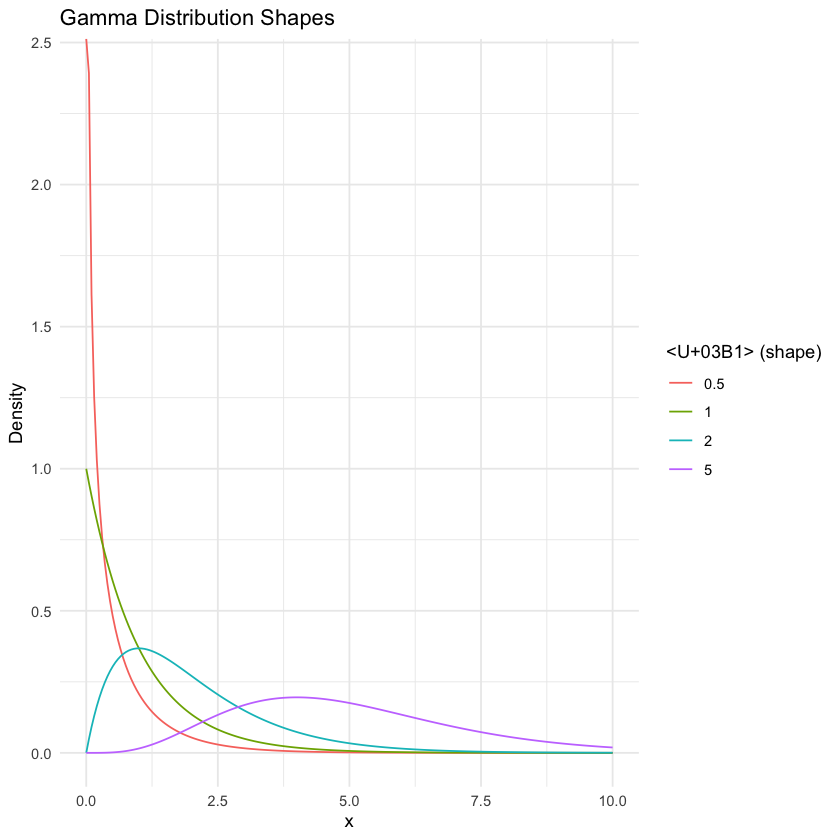

In [5]:
library(ggplot2)

# Compare Gamma shapes
x <- seq(0, 10, length.out = 200)
alphas <- c(0.5, 1, 2, 5)
beta <- 1

df <- expand.grid(x = x, alpha = alphas)
df$density <- dgamma(df$x, shape = df$alpha, rate = beta)

ggplot(df, aes(x = x, y = density, color = factor(alpha))) +
    geom_line() +
    labs(title = "Gamma Distribution Shapes",
         x = "x", y = "Density",
         color = "α (shape)") +
    theme_minimal()

### Next Lesson
Find the next lesson under [mod1_summarytranscript_L4_transformations_of_distributions.ipynb](mod1_summarytranscript_L4_transformations_of_distributions.ipynb)